##Scrapping Google Apps Review - JakLingko
Week 2 NLP Pipeline PBA/ Faiz Musyaffa Ramadhan/ 5026221153

## Initial Setup

In [1]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.2 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import pickle
import re
import time
import datetime
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style
plt.rcParams["figure.figsize"] = (15,10)

## Get Raw Dataset

In [3]:
#Android App Jak Lingko from Google Play at https://play.google.com/store/apps/details?id=com.jaklingkoindonesia.app&hl=id
#The apps name on Google Play titled: Jaklingko by PT. Jakarta Lingko Indonesia
#Dated 4 September 2025 and N of reviews 2,62k

from google_play_scraper import app, Sort, reviews_all

jlingko_reviews = reviews_all(
    'com.jaklingkoindonesia.app',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [4]:
#Save JakLingko reviews into dataframe
df_jlingko = pd.DataFrame(np.array(jlingko_reviews),columns=['content'])
df_jlingko = df_jlingko.join(pd.DataFrame(df_jlingko.pop('content').tolist()))
df_jlingko.to_csv(r'df_jaklingko_raw', index=False)

## Exploratory Data Analysis (EDA)



In [5]:
# Check dataframe
df_jlingko

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,59833db5-0207-4b12-8574-7095d514465c,PUTUT SUGIHARTO,https://play-lh.googleusercontent.com/a-/ALV-U...,APK SAMPAH. katanya pengembalian dana 7 hari k...,1,0,None,2025-09-05 02:41:04,Halo kak PUTUT SUGIHARTO terima kasih telah me...,2025-09-05 13:49:51,None
1,c8666e99-ba2f-4575-b9cd-9be401c1536a,Jidan Cut Achmad,https://play-lh.googleusercontent.com/a-/ALV-U...,idiot,1,0,1.6.14,2025-09-04 00:17:36,Halo kak Jidan Cut Achmad terima kasih telah m...,2025-09-04 14:58:05,1.6.14
2,b5112030-80d6-4d14-b620-48b3abd4e9ad,Karlina Lina,https://play-lh.googleusercontent.com/a/ACg8oc...,kode otp nya ko tidak dikasih trus ya..,2,0,None,2025-09-02 06:39:30,Halo kak Karlina terima kasih telah menggunaka...,2025-09-05 13:51:54,None
3,5d58f702-f041-4c66-b074-b2ca4df48103,Melsa Rsnda,https://play-lh.googleusercontent.com/a/ACg8oc...,sumpah supir jaklingko ga ada yang ramahh,1,0,1.6.14,2025-08-27 02:29:44,Halo kak Melsa Rsnda terima kasih telah menggu...,2025-08-28 12:52:31,1.6.14
4,c082f2ea-37a7-4fd9-95a7-532c2b392aaa,Hotnida Novita Sary,https://play-lh.googleusercontent.com/a-/ALV-U...,"beli tiket mrt. dana kepotong, tiket barcode t...",1,0,1.6.14,2025-08-25 10:36:45,Halo kak Hotnida Novita Sary terima kasih tela...,2025-08-28 12:53:25,1.6.14
...,...,...,...,...,...,...,...,...,...,...,...
1143,b6958e11-3013-475b-aa14-40a2251df018,Ahmad Fahrezi,https://play-lh.googleusercontent.com/a-/ALV-U...,Mantapp,5,1,1.0.10,2022-01-03 06:28:40,None,NaT,1.0.10
1144,7b5085b9-8f52-44af-9960-48dbbad838f6,chiva olivia bilah,https://play-lh.googleusercontent.com/a-/ALV-U...,mantapp aplikasinya,5,0,1.0.10,2022-01-03 06:28:39,None,NaT,1.0.10
1145,8be9de9d-fc82-419b-b1a3-8143505f80dc,Debby Bella dhina,https://play-lh.googleusercontent.com/a/ACg8oc...,Wow akhirnya bisa coba Jak Lingko App ini. Mak...,5,6,1.0.10,2022-01-03 05:10:16,Thank you Sist. Please do not hesitate if you ...,2022-01-03 06:12:35,1.0.10
1146,7182eb62-5d8b-48d0-87cc-b75f86771f3e,Anindia Putri herawan,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya pengguna baru...baru download...sdh lihat...,3,7,1.0.10,2022-01-02 03:29:23,Hi Sista. Thanks for the stars. Because JakLin...,2022-01-03 06:08:19,1.0.10


In [6]:
df_jlingko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1148 non-null   object        
 1   userName              1148 non-null   object        
 2   userImage             1148 non-null   object        
 3   content               1148 non-null   object        
 4   score                 1148 non-null   int64         
 5   thumbsUpCount         1148 non-null   int64         
 6   reviewCreatedVersion  935 non-null    object        
 7   at                    1148 non-null   datetime64[ns]
 8   replyContent          825 non-null    object        
 9   repliedAt             825 non-null    datetime64[ns]
 10  appVersion            935 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 98.8+ KB


In [7]:
#We do not need data for column reviewId, userName, userImage so we will show only these column
df_jlingko.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,APK SAMPAH. katanya pengembalian dana 7 hari k...,1,0,None,2025-09-05 02:41:04,Halo kak PUTUT SUGIHARTO terima kasih telah me...,2025-09-05 13:49:51
1,idiot,1,0,1.6.14,2025-09-04 00:17:36,Halo kak Jidan Cut Achmad terima kasih telah m...,2025-09-04 14:58:05
2,kode otp nya ko tidak dikasih trus ya..,2,0,None,2025-09-02 06:39:30,Halo kak Karlina terima kasih telah menggunaka...,2025-09-05 13:51:54
3,sumpah supir jaklingko ga ada yang ramahh,1,0,1.6.14,2025-08-27 02:29:44,Halo kak Melsa Rsnda terima kasih telah menggu...,2025-08-28 12:52:31
4,"beli tiket mrt. dana kepotong, tiket barcode t...",1,0,1.6.14,2025-08-25 10:36:45,Halo kak Hotnida Novita Sary terima kasih tela...,2025-08-28 12:53:25
...,...,...,...,...,...,...,...
1143,Mantapp,5,1,1.0.10,2022-01-03 06:28:40,None,NaT
1144,mantapp aplikasinya,5,0,1.0.10,2022-01-03 06:28:39,None,NaT
1145,Wow akhirnya bisa coba Jak Lingko App ini. Mak...,5,6,1.0.10,2022-01-03 05:10:16,Thank you Sist. Please do not hesitate if you ...,2022-01-03 06:12:35
1146,Saya pengguna baru...baru download...sdh lihat...,3,7,1.0.10,2022-01-02 03:29:23,Hi Sista. Thanks for the stars. Because JakLin...,2022-01-03 06:08:19


In [8]:
#Check number of reviews scores
df_jlingko['score'].value_counts()

,count
score,
1,697
5,306
2,68
3,51
4,26


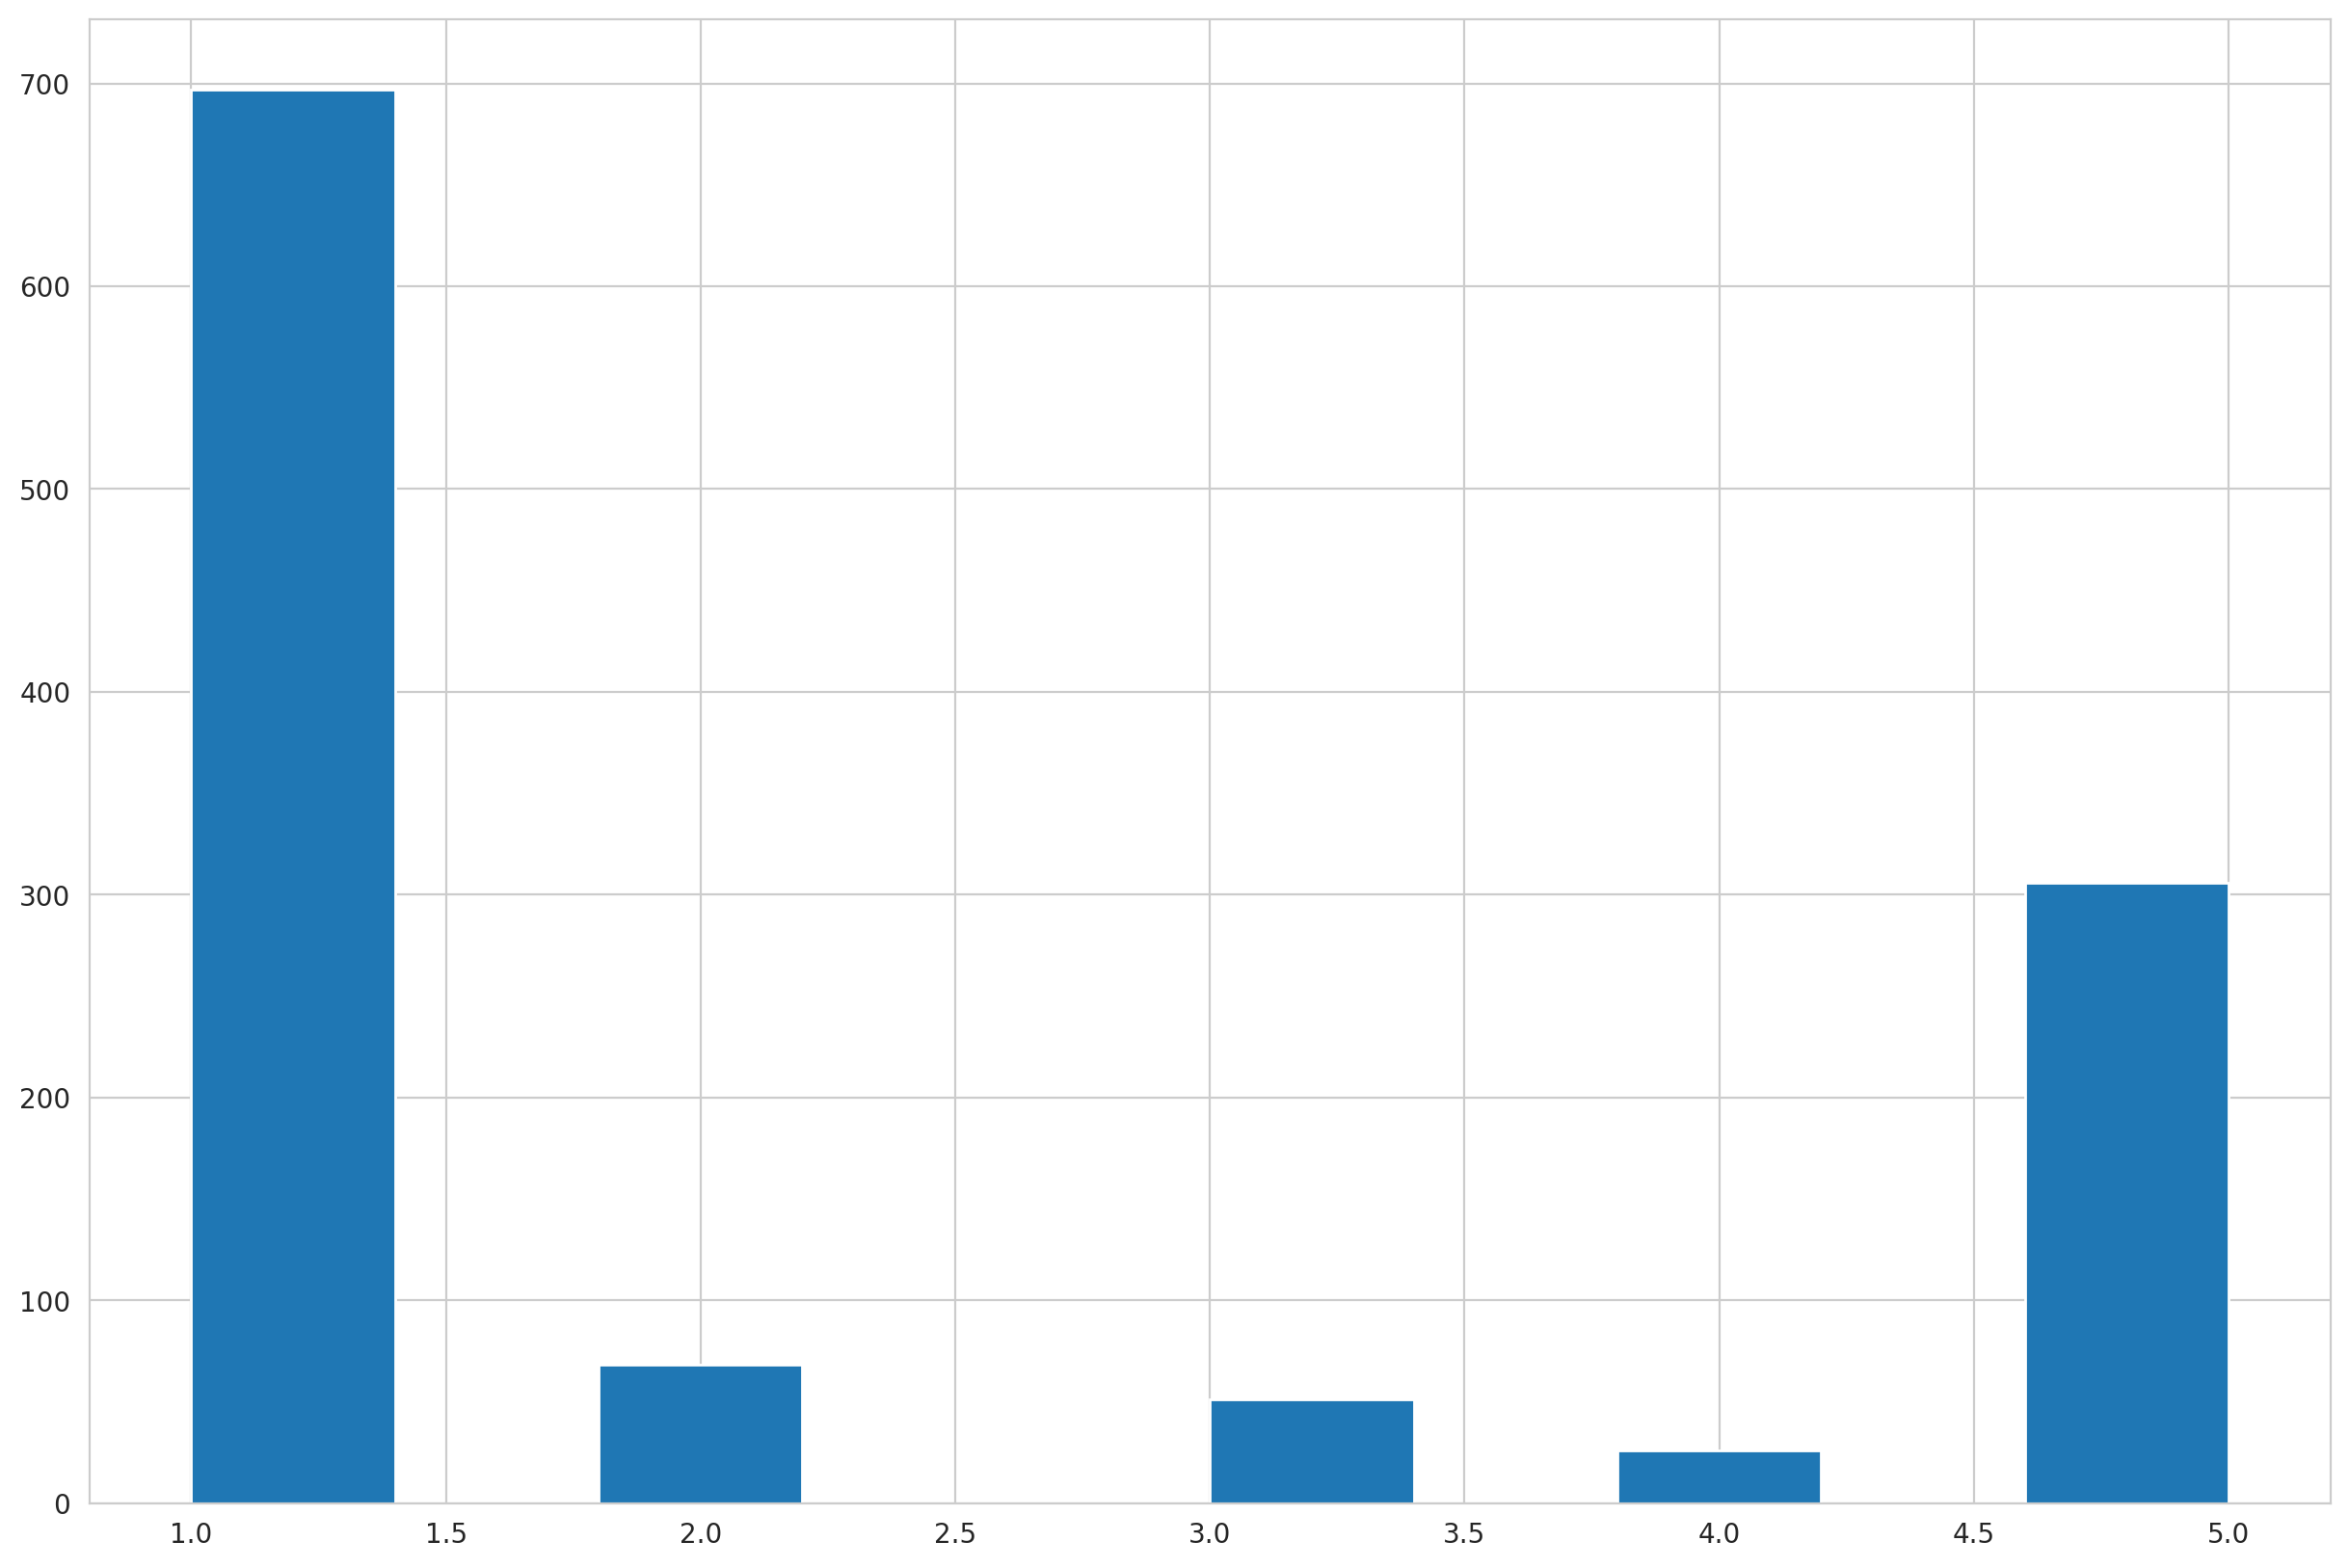

In [9]:
# Score distribution check
plt.hist(df_jlingko['score'])
plt.show()

## Text Preprocessing

### Lowercasing

In [10]:
# Lower casing
# Change the reviews type to string
df_jlingko['content'] = df_jlingko['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_jlingko['content'][188])
print(df_jlingko['content'][1])
print(df_jlingko['content'][1000])

Dear trans jakarta Tolong dong klo emng niat bikin aplikasi untuk pembelian tiket online di perbarui semua di setiap halte mesin tap in dan tap out nya biar ga bikin susah orang,mesin jadul masi aja di pake
idiot
Kusut


In [11]:
#Lowercase all reviews to see the difference
df_jlingko['content']= df_jlingko['content'].apply(lambda x: x.lower())
print(df_jlingko['content'][188])
print(df_jlingko['content'][1])
print(df_jlingko['content'][1000])

dear trans jakarta tolong dong klo emng niat bikin aplikasi untuk pembelian tiket online di perbarui semua di setiap halte mesin tap in dan tap out nya biar ga bikin susah orang,mesin jadul masi aja di pake
idiot
kusut


### Tokenization

In [23]:
import nltk
from nltk.tokenize import word_tokenize

# pastikan resource punkt udah ada
nltk.download('punkt_tab')

# bikin kolom baru 'tokens' hasil tokenisasi
df_jlingko['tokens'] = df_jlingko['content'].apply(word_tokenize)

# cek hasilnya
print(df_jlingko[['content', 'tokens']].head(10))


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                             content  \
0  apk sampah. katanya pengembalian dana 7 hari k...   
1                                              idiot   
2            kode otp nya ko tidak dikasih trus ya..   
3          sumpah supir jaklingko ga ada yang ramahh   
4  beli tiket mrt. dana kepotong, tiket barcode t...   
5  jk 41 jangan pada malas napa kerja woi setenga...   
6  gak kartu, gak aplikasi sama sama perlu di upg...   
7  sistem nya tolong di update min, lebih baik qr...   
8                         bjir tbtb keinstal sendiri   
9  waaaooo keren abis aplikasinya sangat membantu...   

                                              tokens  
0  [apk, sampah, ., katanya, pengembalian, dana, ...  
1                                            [idiot]  
2  [kode, otp, nya, ko, tidak, dikasih, trus, ya,...  
3  [sumpah, supir, jaklingko, ga, ada, yang, ramahh]  
4  [beli, tiket, mrt, ., dana, kepotong, ,, tiket...  
5  [jk, 41, jangan, pada, malas, napa, kerja, woi... 

### Before Stop Words Preprocessing

In [24]:
# function to plot most frequent terms
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    # Import FreqDist from nltk.probability
    from nltk.probability import FreqDist
    fdist = FreqDist(all_words)

    words_df = pd.DataFrame({
        'word': list(fdist.keys()),
        'count': list(fdist.values())
    })

    # selecting top N most frequent words
    d = words_df.nlargest(columns="count", n=terms)

    plt.figure(figsize=(20, 5))
    # Use the 'rainbow' colormap for the bar plot
    ax = sns.barplot(data=d, x="word", y="count", palette="rainbow")
    ax.set(ylabel='Count')

    # Tambahin title
    plt.title(f"Most Frequent Words (Before Stop Words Removal) - Top {terms}")

    plt.show()

/tmp/ipython-input-2314564518.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x="word", y="count", palette="rainbow")


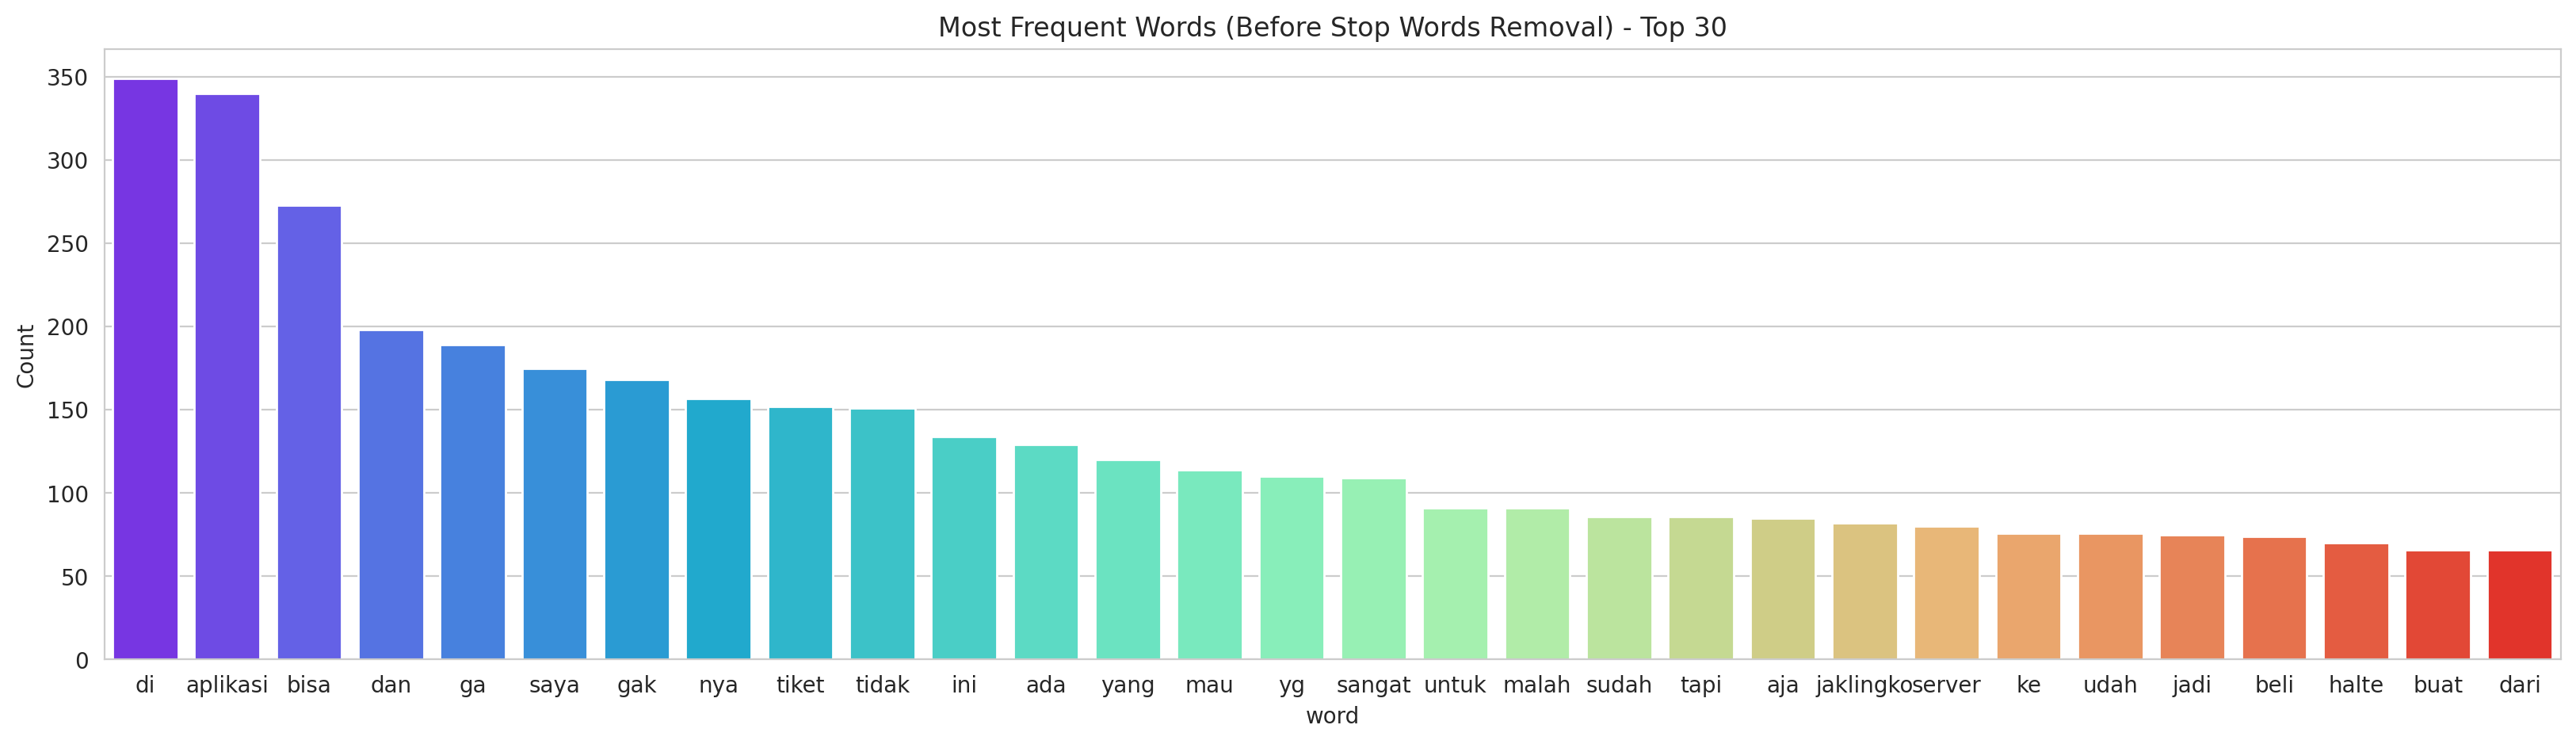

In [27]:
freq_words(df_jlingko['content'])

### Stopwords Removal (Indonesian Stopwords)

In [14]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


,Word,Frequency
0,aplikasi,340
1,ga,189
2,gak,168
3,nya,157
4,tiket,152
...,...,...
95,kerja,17
96,sistem,17
97,sih,17
98,busway,17


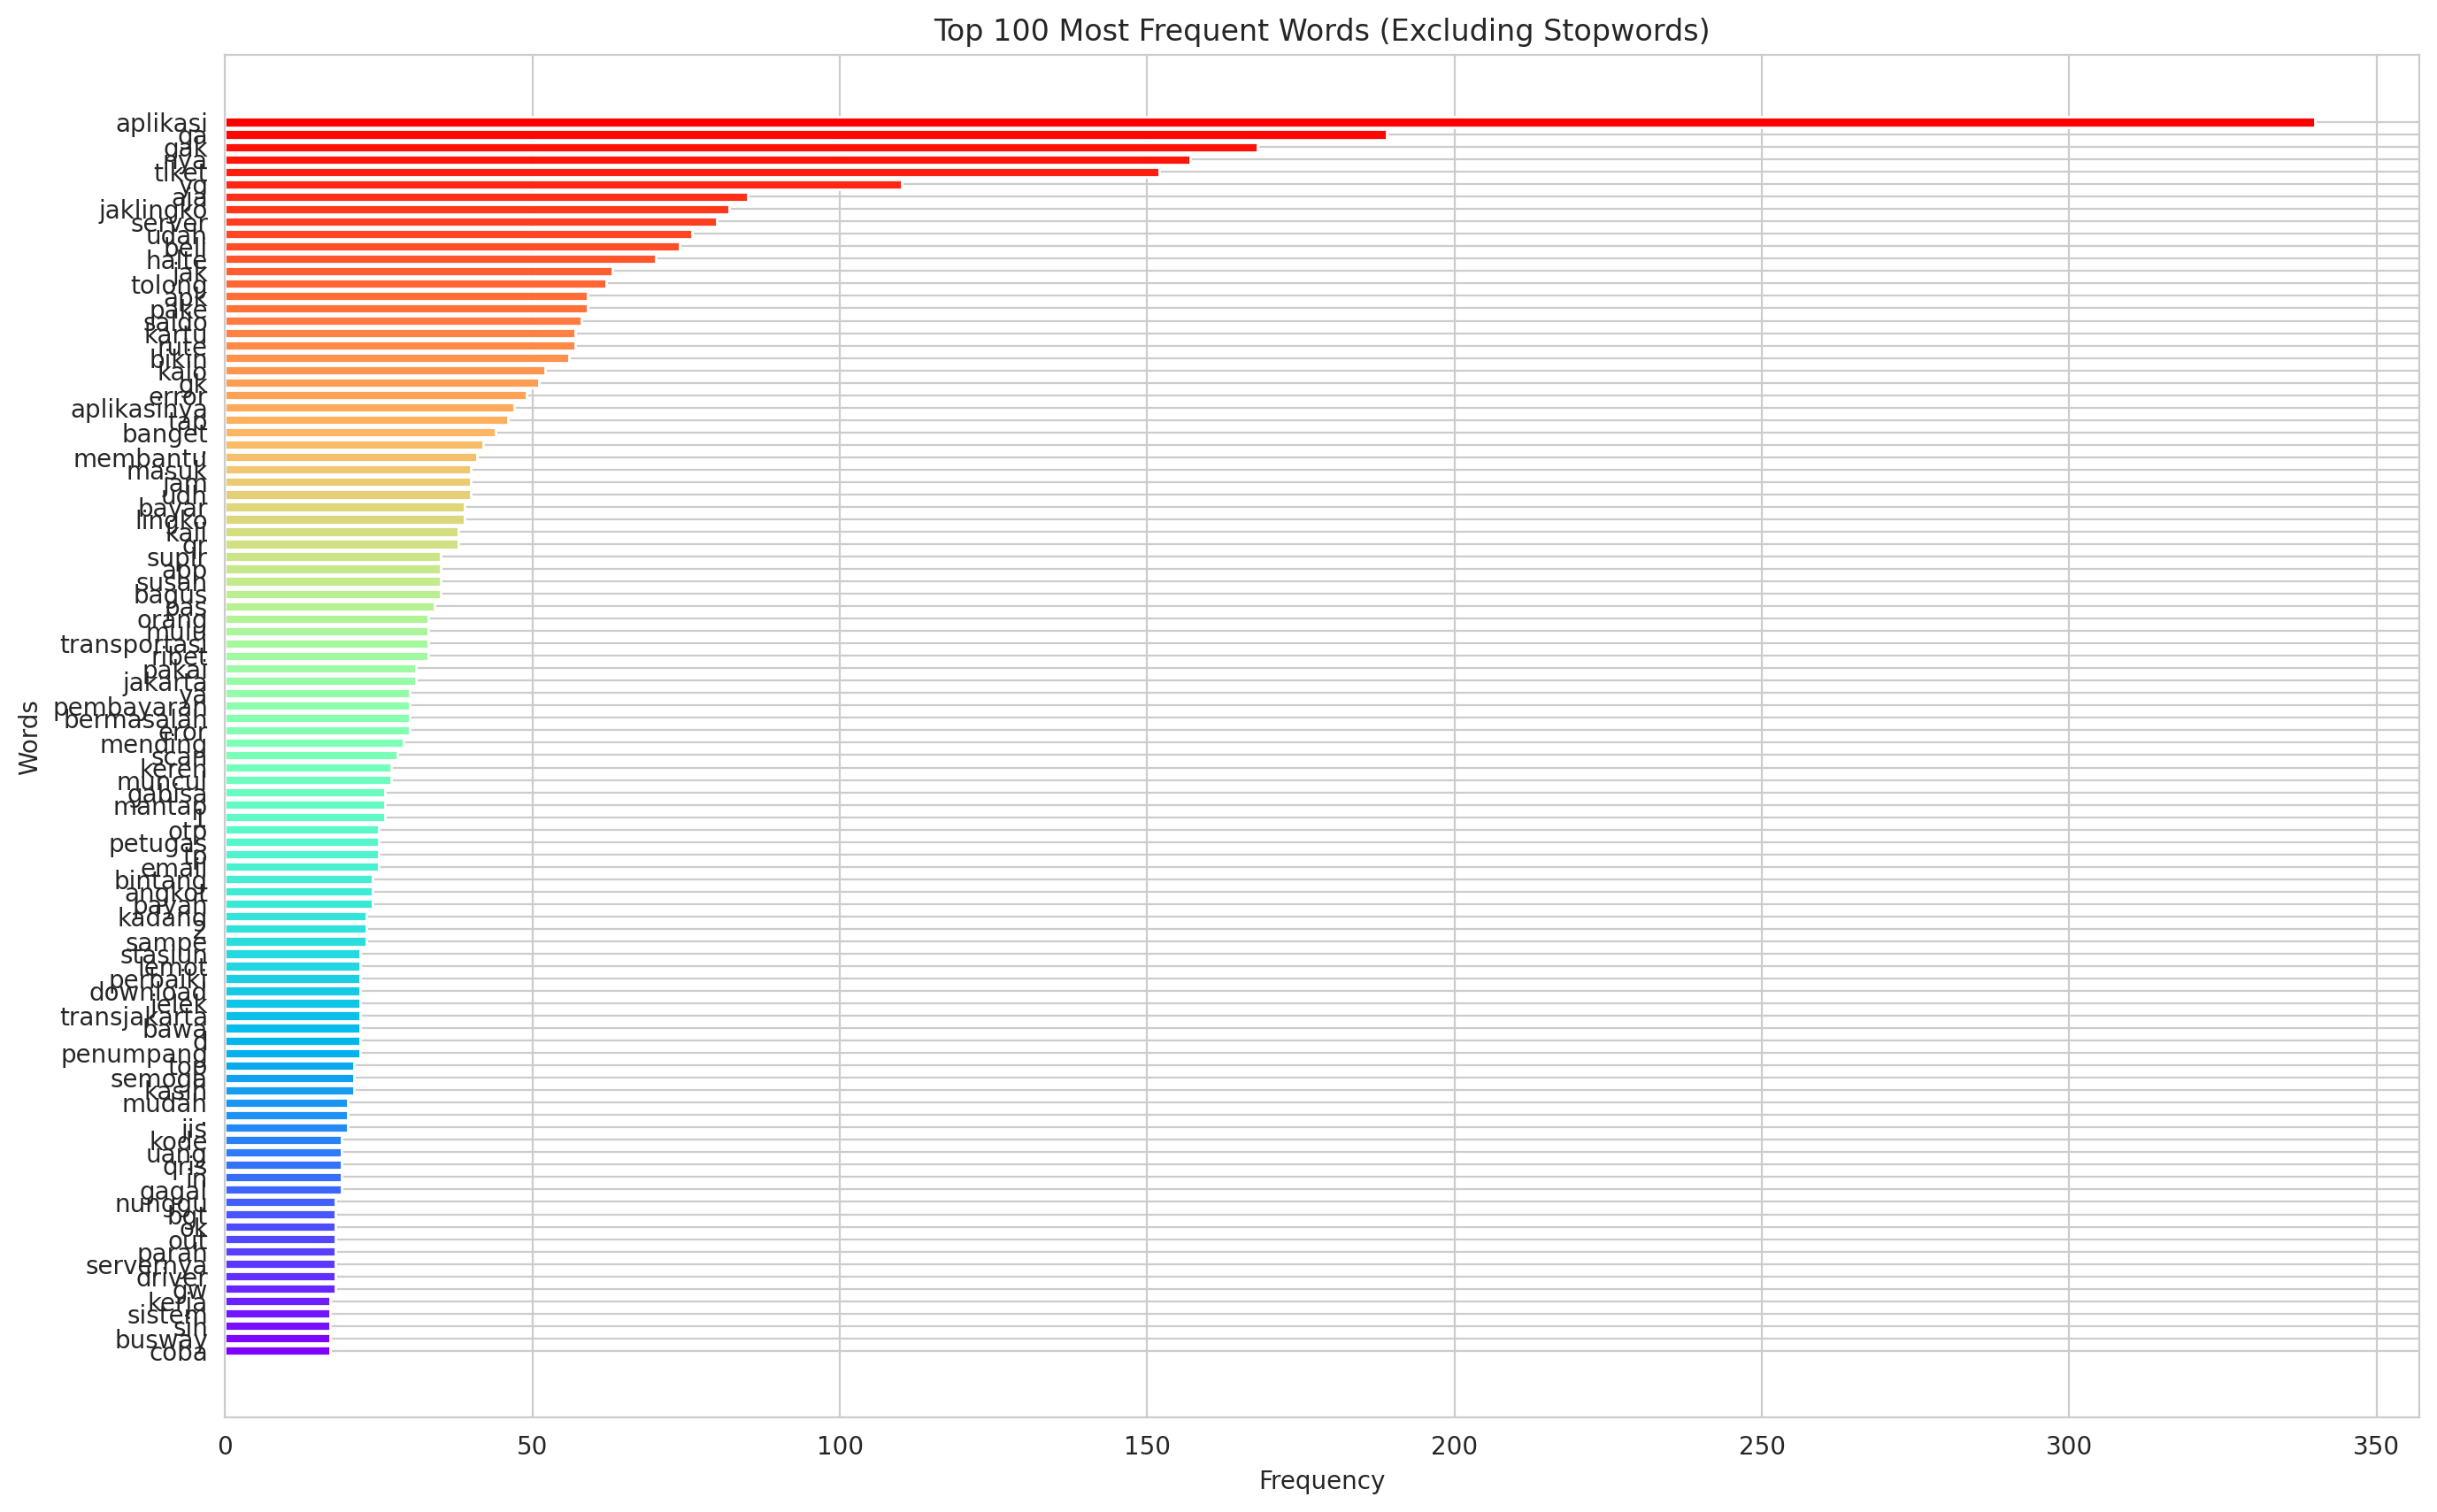

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming the text column is named 'content'
text_column = 'content'

# Combine all text data into one string
all_text = ' '.join(df_jlingko[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words with rainbow colormap (horizontal barplot)
plt.figure(figsize=(16, 10))

# generate warna rainbow sesuai jumlah kata
colors = plt.cm.rainbow(np.linspace(0, 1, len(word_freq_df)))

# plot horizontal bar
bars = plt.barh(
    word_freq_df['Word'][::-1],
    word_freq_df['Frequency'][::-1],
    color=colors
)

plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 100 Most Frequent Words (Excluding Stopwords)")
plt.show()


In [17]:
common_words

[('aplikasi', 340),
 ('ga', 189),
 ('gak', 168),
 ('nya', 157),
 ('tiket', 152),
 ('yg', 110),
 ('aja', 85),
 ('jaklingko', 82),
 ('server', 80),
 ('udah', 76),
 ('beli', 74),
 ('halte', 70),
 ('jak', 63),
 ('tolong', 62),
 ('apk', 59),
 ('pake', 59),
 ('saldo', 58),
 ('kartu', 57),
 ('rute', 57),
 ('bikin', 56),
 ('kalo', 52),
 ('gk', 51),
 ('error', 49),
 ('aplikasinya', 47),
 ('tap', 46),
 ('banget', 44),
 (',', 42),
 ('membantu', 41),
 ('masuk', 40),
 ('jam', 40),
 ('udh', 40),
 ('bayar', 39),
 ('lingko', 39),
 ('kali', 38),
 ('qr', 38),
 ('supir', 35),
 ('app', 35),
 ('susah', 35),
 ('bagus', 35),
 ('pas', 34),
 ('orang', 33),
 ('mulu', 33),
 ('transportasi', 33),
 ('ribet', 33),
 ('pakai', 31),
 ('jakarta', 31),
 ('ya', 30),
 ('pembayaran', 30),
 ('bermasalah', 30),
 ('eror', 30),
 ('mending', 29),
 ('scan', 28),
 ('keren', 27),
 ('muncul', 27),
 ('gabisa', 26),
 ('mantap', 26),
 ('1', 26),
 ('otp', 25),
 ('petugas', 25),
 ('tp', 25),
 ('email', 25),
 ('bintang', 24),
 ('angkot',

In [18]:
# Pastikan indonesian_stopwords berbentuk set
indonesian_stopwords = set(indonesian_stopwords)

# Add custom stopwords dari hasil top 100 frequent words
custom_stopwords = {
    # filler umum
    "ga", "gak", "gk", "udah", "udh", "aja", "aja", "aja", "ya", "tp", "bgt", "ok", "gw", "sih",
    # kata ganti/partikel
    "nya", "yg", "kalo", "d", "in",
    # tanda baca/angka
    ",", ".", "1", "2",
    # umum tidak bermakna kontekstual
    "aja", "mulu", "udah", "udh", "sampe"
}


# Pastikan kata-kata penting tidak ikut jadi stopwords
for word in ["aplikasi", "apk", "app"]:
    indonesian_stopwords.discard(word)

# Merge with existing stopwords
indonesian_stopwords.update(custom_stopwords)

print("Updated stopwords:", sorted(indonesian_stopwords))


Updated stopwords: [',', '.', '1', '2', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'aja', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-k

### Stopwords x Tokenization

🔎 Words removed by custom stopwords:


,Word,Frequency
0,di,349
1,bisa,273
2,dan,198
3,ga,189
4,saya,175
...,...,...
335,kepada,1
336,mirip,1
337,apabila,1
338,masing-masing,1


,Word,Frequency
0,aplikasi,340
1,tiket,152
2,jaklingko,82
3,server,80
4,beli,74
...,...,...
95,g,15
96,ngga,15
97,biar,15
98,user,15


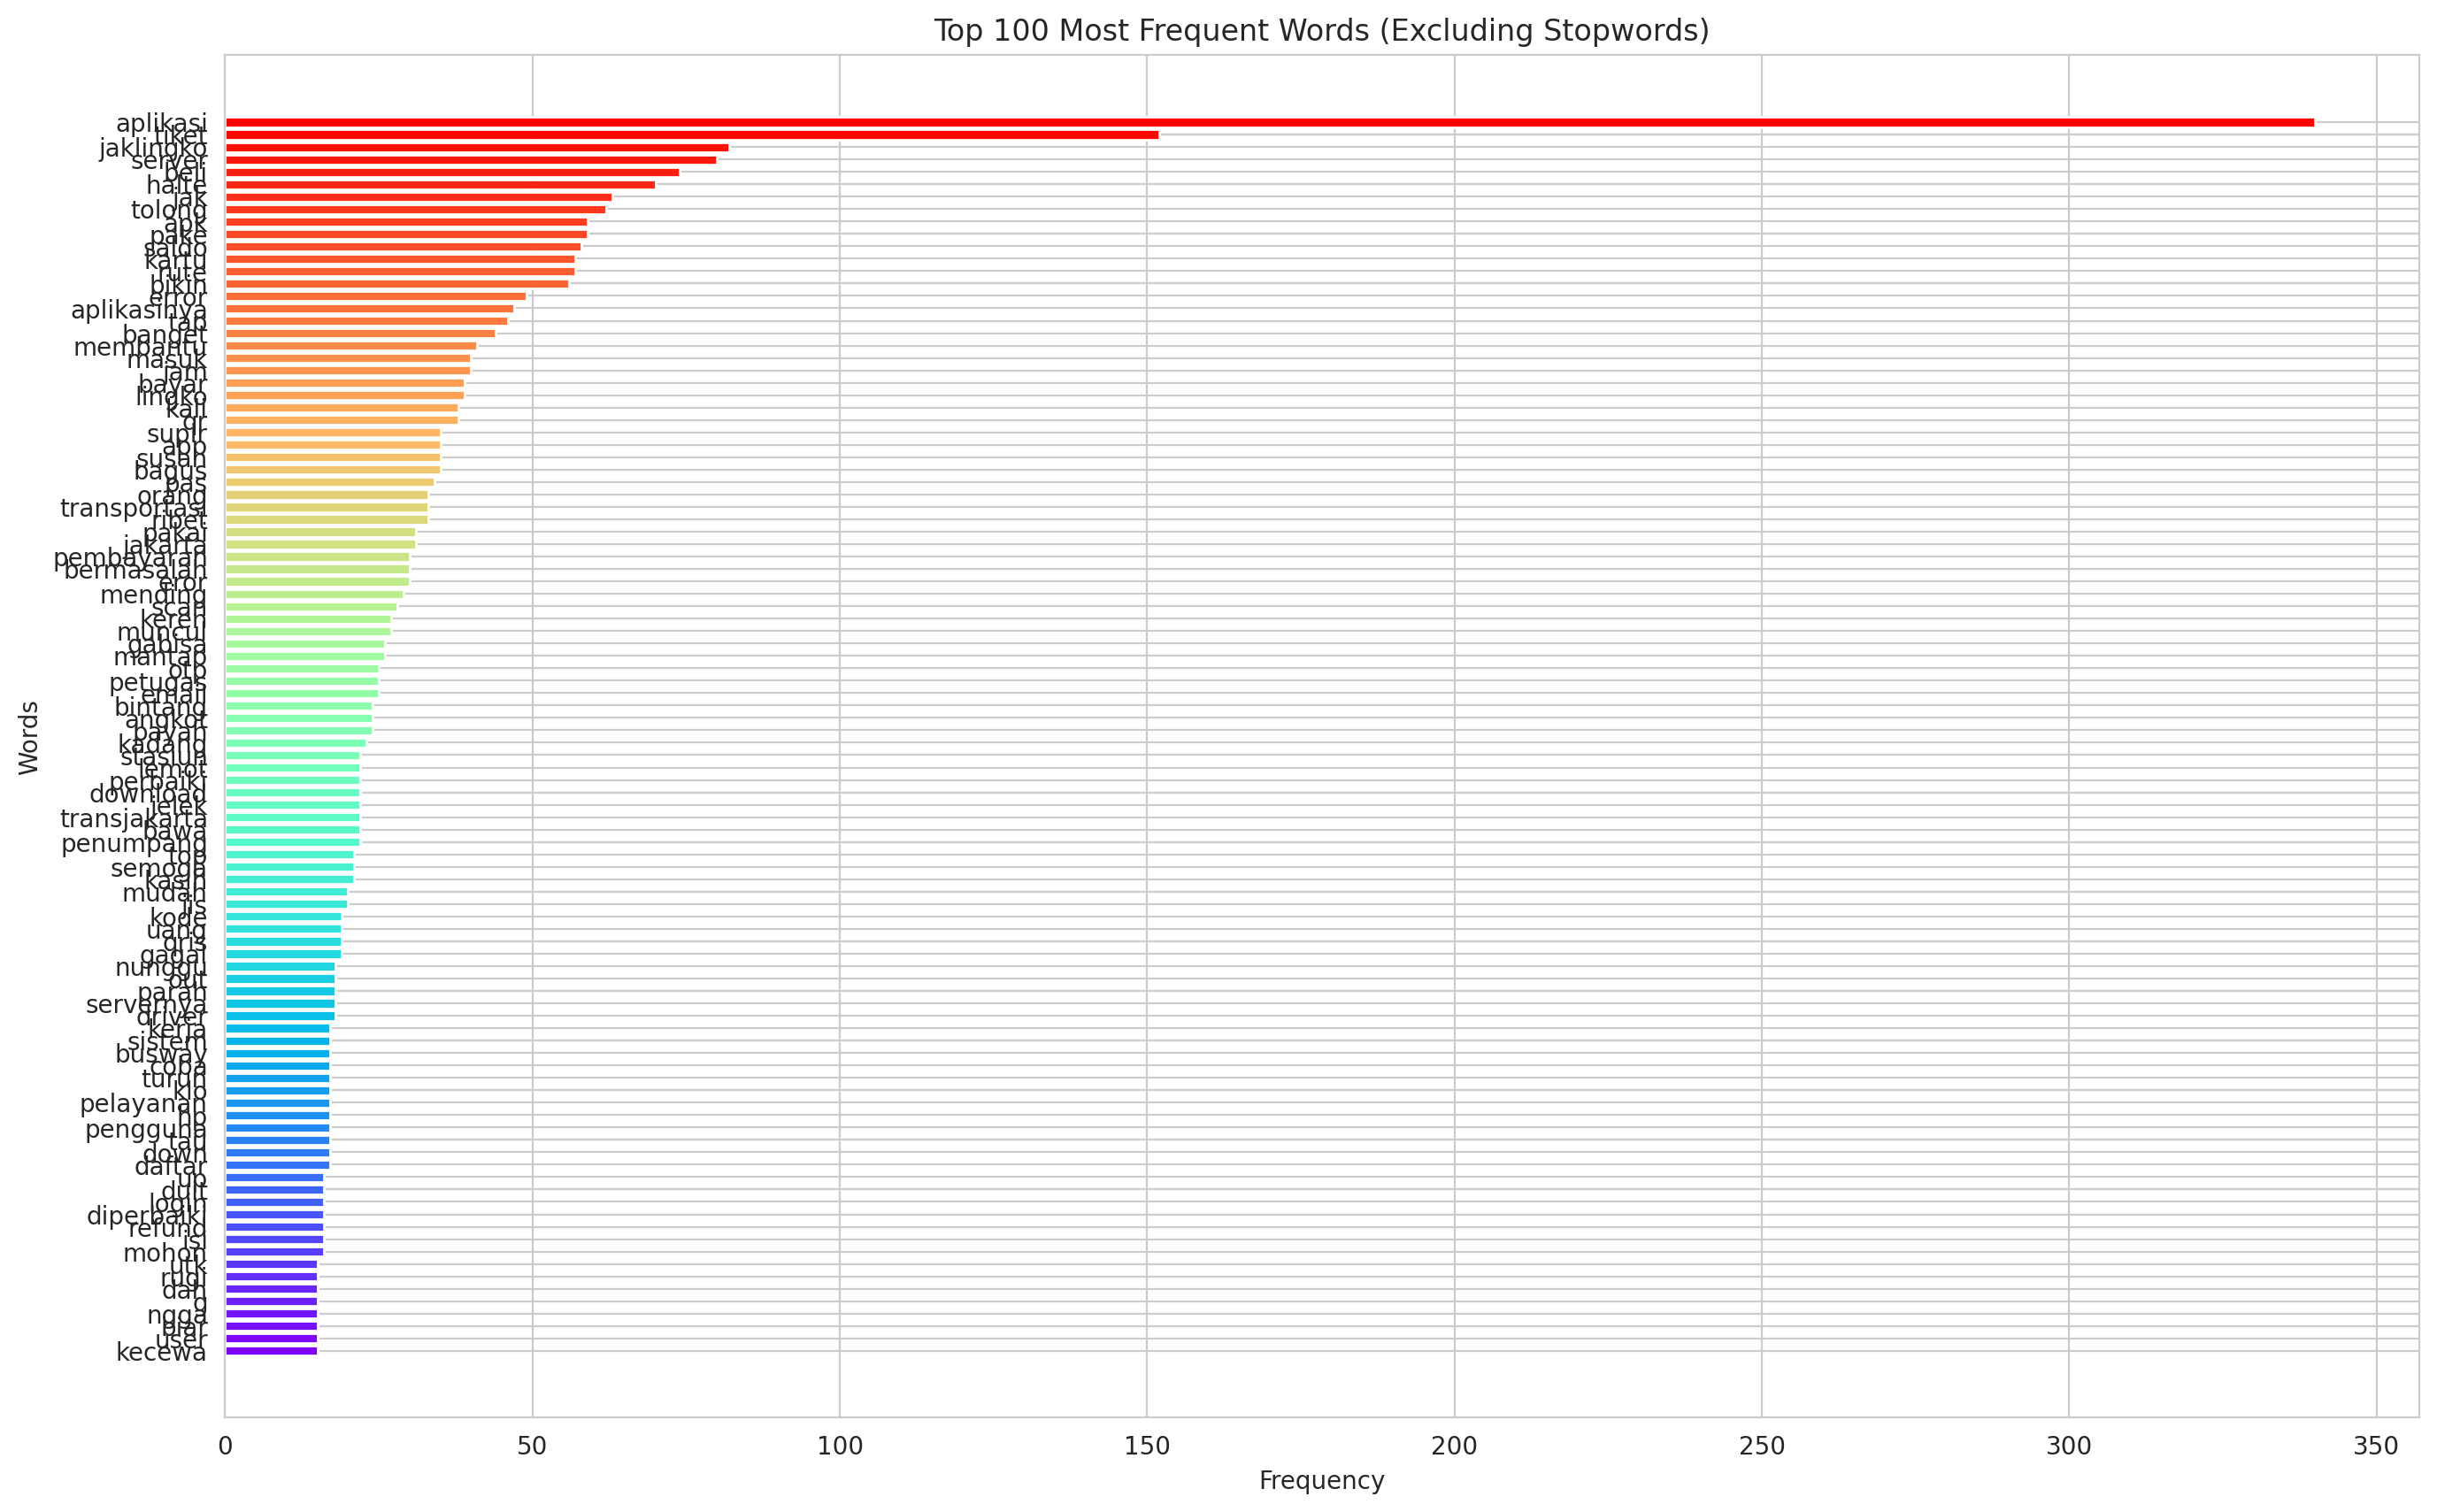

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming the text column is named 'content'
text_column = 'content'

# Combine all text data into one string
all_text = ' '.join(df_jlingko[text_column].dropna().astype(str))

# Tokenize words
words = [word.lower() for word in all_text.split()]

# Cari kata yang kehapus karena stopwords
removed_words = [word for word in words if word in indonesian_stopwords]

# Hitung frekuensi kata yang kehapus
removed_counts = Counter(removed_words)
removed_df = pd.DataFrame(removed_counts.most_common(), columns=['Word', 'Frequency'])

print("🔎 Words removed by custom stopwords:")
display(removed_df)

# Filter stopwords
filtered_words = [word for word in words if word not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words with rainbow colormap (horizontal barplot)
plt.figure(figsize=(16, 10))

# generate warna rainbow sesuai jumlah kata
colors = plt.cm.rainbow(np.linspace(0, 1, len(word_freq_df)))

# plot horizontal bar
bars = plt.barh(
    word_freq_df['Word'][::-1],
    word_freq_df['Frequency'][::-1],
    color=colors
)

plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 100 Most Frequent Words (Excluding Stopwords)")
plt.show()


In [21]:
# fungsi untuk hapus stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.lower().split()
        return ' '.join([w for w in words if w not in indonesian_stopwords])
    return text

# bikin kolom baru di dataframe
df_jlingko['clean_content'] = df_jlingko['content'].apply(remove_stopwords)

# cek hasil
print(df_jlingko[['content', 'clean_content']].head(10))


                                             content  \
0  apk sampah. katanya pengembalian dana 7 hari k...   
1                                              idiot   
2            kode otp nya ko tidak dikasih trus ya..   
3          sumpah supir jaklingko ga ada yang ramahh   
4  beli tiket mrt. dana kepotong, tiket barcode t...   
5  jk 41 jangan pada malas napa kerja woi setenga...   
6  gak kartu, gak aplikasi sama sama perlu di upg...   
7  sistem nya tolong di update min, lebih baik qr...   
8                         bjir tbtb keinstal sendiri   
9  waaaooo keren abis aplikasinya sangat membantu...   

                                       clean_content  
0  apk sampah. pengembalian dana 7 kerja..setelah...  
1                                              idiot  
2                      kode otp ko dikasih trus ya..  
3                      sumpah supir jaklingko ramahh  
4  beli tiket mrt. dana kepotong, tiket barcode k...  
5              jk 41 malas napa kerja woi jam nunggu 

In [28]:
df_jlingko['clean_tokens'] = df_jlingko['tokens'].apply(
    lambda toks: [w for w in toks if w not in indonesian_stopwords]
)

In [29]:
# Liat 5 baris pertama
print(df_jlingko[['content', 'tokens', 'clean_tokens']].head())

# Liat baris tertentu (misal index ke-100)
print(df_jlingko[['content', 'tokens', 'clean_tokens']].iloc[100])

# Kalau mau tampil rapi (pake Pandas display)
import pandas as pd
pd.set_option('max_colwidth', 200)  # biar teksnya ga dipotong
display(df_jlingko[['content', 'tokens', 'clean_tokens']].sample(5))


                                             content  \
0  apk sampah. katanya pengembalian dana 7 hari k...   
1                                              idiot   
2            kode otp nya ko tidak dikasih trus ya..   
3          sumpah supir jaklingko ga ada yang ramahh   
4  beli tiket mrt. dana kepotong, tiket barcode t...   

                                              tokens  \
0  [apk, sampah, ., katanya, pengembalian, dana, ...   
1                                            [idiot]   
2  [kode, otp, nya, ko, tidak, dikasih, trus, ya,...   
3  [sumpah, supir, jaklingko, ga, ada, yang, ramahh]   
4  [beli, tiket, mrt, ., dana, kepotong, ,, tiket...   

                                        clean_tokens  
0  [apk, sampah, pengembalian, dana, 7, kerja, .....  
1                                            [idiot]  
2                 [kode, otp, ko, dikasih, trus, ..]  
3                 [sumpah, supir, jaklingko, ramahh]  
4  [beli, tiket, mrt, dana, kepotong, tiket, barc..

,content,tokens,clean_tokens
124,"aplikasi gembel, barcode sering ga valid. nyusahin orang mau berangkat kerja, mana searching dari halte apa kemana malah yang muncul halte lain jadi kadang salah padahal lg buru2. mending benerin ...","[aplikasi, gembel, ,, barcode, sering, ga, valid, ., nyusahin, orang, mau, berangkat, kerja, ,, mana, searching, dari, halte, apa, kemana, malah, yang, muncul, halte, lain, jadi, kadang, salah, pa...","[aplikasi, gembel, barcode, valid, nyusahin, orang, berangkat, kerja, searching, halte, kemana, muncul, halte, kadang, salah, lg, buru2, mending, benerin, deh, ui, ux, nih, aplikasi, gembel]"
243,isi pulsa gak bisa padahal saldonya ada gimana nih apk agak gaje bet,"[isi, pulsa, gak, bisa, padahal, saldonya, ada, gimana, nih, apk, agak, gaje, bet]","[isi, pulsa, saldonya, gimana, nih, apk, gaje, bet]"
239,"tolong keakuratan halte di tingkatkan, kan lucu anda mau turun harus bwda halte dari halte yang diinginkan karena qris nya tidak bisa di scan","[tolong, keakuratan, halte, di, tingkatkan, ,, kan, lucu, anda, mau, turun, harus, bwda, halte, dari, halte, yang, diinginkan, karena, qris, nya, tidak, bisa, di, scan]","[tolong, keakuratan, halte, tingkatkan, lucu, turun, bwda, halte, halte, qris, scan]"
996,mengecewakan,[mengecewakan],[mengecewakan]
676,kalo udah disebar publik gini harusnya sistemnya lebih siap lagi,"[kalo, udah, disebar, publik, gini, harusnya, sistemnya, lebih, siap, lagi]","[disebar, publik, gini, sistemnya]"


### Stemmer

In [30]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 12.8 MB/s eta 0:00:00


In [31]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Apply stemming ke clean_tokens
df_jlingko['stemmed_tokens'] = df_jlingko['clean_tokens'].apply(
    lambda toks: [stemmer.stem(w) for w in toks]
)

# Kalau mau bikin string lagi (buat TF-IDF atau ML klasik)
df_jlingko['final_text'] = df_jlingko['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Cek hasil
print(df_jlingko[['content', 'clean_tokens', 'stemmed_tokens', 'final_text']].head())


                                                                                                                                                                                                   content  \
0  apk sampah. katanya pengembalian dana 7 hari kerja..setelah 7 hari kerja gak masuk rekening saldo nya. masa gue di suruh tanya ke bank. jelas jaklingko angat tangan dengan masalah pemakainya apk s...   
1                                                                                                                                                                                                    idiot   
2                                                                                                                                                                  kode otp nya ko tidak dikasih trus ya..   
3                                                                                                                                                                sumpah supir ja

In [32]:
# Kolom penting dari review
important_cols = ["content", "score", "thumbsUpCount",
                  "reviewCreatedVersion", "at",
                  "replyContent", "repliedAt"]

# Kolom hasil preprocessing
preproc_cols = ["tokens", "clean_tokens", "stemmed_tokens", "final_text"]

# Gabung jadi satu
df_preview = df_jlingko.loc[:, important_cols + preproc_cols]

# Biar teks ga kepotong
import pandas as pd
pd.set_option('max_colwidth', 150)

# Tampilkan sample 5 row
display(df_preview.sample(5))

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,tokens,clean_tokens,stemmed_tokens,final_text
1098,bagus,5,0,None,2022-05-21 07:10:18,None,NaT,[bagus],[bagus],[bagus],bagus
455,"pemilihan halte tdk tepat,",1,0,1.6.1,2023-04-30 11:50:28,"Halo kak Nadya Eristiyanti, terima kasih telah menggunakan Aplikasi JakLingko dan mohon maaf atas ketidaknyamanannya yang Anda alami. Untuk memban...",2024-02-02 15:03:59,"[pemilihan, halte, tdk, tepat, ,]","[pemilihan, halte, tdk]","[pilih, halte, tdk]",pilih halte tdk
780,"payah eror mulu server down kali. ""kami akan segera kembali untuk yang terbaik untuk anda"". prett dah dari siang ampe sore. gmna mao pesen",1,0,1.3.2,2022-07-21 10:55:11,Halo kak Angga aprillian terima kasih telah menggunakan Aplikasi JakLingko dan mohon maaf atas ketidaknyamanannya. Untuk membantu kami memahami ke...,2024-05-11 14:33:59,"[payah, eror, mulu, server, down, kali, ., ``, kami, akan, segera, kembali, untuk, yang, terbaik, untuk, anda, '', ., prett, dah, dari, siang, amp...","[payah, eror, server, down, kali, ``, terbaik, '', prett, dah, siang, ampe, sore, gmna, mao, pesen]","[payah, eror, server, down, kali, , baik, , prett, dah, siang, ampe, sore, gmna, mao, sen]",payah eror server down kali baik prett dah siang ampe sore gmna mao sen
612,aplikasinya gak sebagus trafi tempo dulu yang bisa tau posisi bus ada dimana,1,0,None,2022-08-22 16:52:57,"Halo kak Agus Fauji, terima kasih telah menggunakan Aplikasi JakLingko dan mohon maaf atas ketidaknyamanannya. Untuk membantu kami memahami kendal...",2024-03-29 15:07:58,"[aplikasinya, gak, sebagus, trafi, tempo, dulu, yang, bisa, tau, posisi, bus, ada, dimana]","[aplikasinya, sebagus, trafi, tempo, tau, posisi, bus, dimana]","[aplikasi, bagus, trafi, tempo, tau, posisi, bus, mana]",aplikasi bagus trafi tempo tau posisi bus mana
270,sedih gak ada jalur jaklingko kwk nya,2,0,None,2024-03-27 04:30:03,Halo kak Isa H terima kasih telah menggunakan Aplikasi JakLingko dan mohon maaf atas ketidaknyamanannya. Untuk membantu kami memahami kendala yang...,2024-03-27 13:18:13,"[sedih, gak, ada, jalur, jaklingko, kwk, nya]","[sedih, jalur, jaklingko, kwk]","[sedih, jalur, jaklingko, kwk]",sedih jalur jaklingko kwk


## Clean Dataset

In [33]:
# CLEAN data (lengkap dengan preprocessing)
df_jlingko_clean = df_jlingko.loc[:, [
    "content", "score", "thumbsUpCount", "reviewCreatedVersion", "at",
    "replyContent", "repliedAt", "tokens", "clean_tokens", "stemmed_tokens", "final_text"
]]
df_jlingko_clean.to_csv("df_jaklingko_clean.csv", index=False)
